### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Análisis de facturación de las 4 tiendas

print("\n1. FACTURACIÓN TOTAL POR TIENDA\n")
facturacion1 = tienda1['Precio'].sum()
facturacion2 = tienda2['Precio'].sum()
facturacion3 = tienda3['Precio'].sum()
facturacion4 = tienda4['Precio'].sum()

#Imprimimos el resultado

print(f"Tienda 1: ${facturacion1:,.0f}")
print(f"Tienda 2: ${facturacion2:,.0f}")
print(f"Tienda 3: ${facturacion3:,.0f}")
print(f"Tienda 4: ${facturacion4:,.0f}")



1. FACTURACIÓN TOTAL POR TIENDA

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


/tmp/ipython-input-3082701053.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3082701053.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${x/1e6:.0f}M' for x in valores])


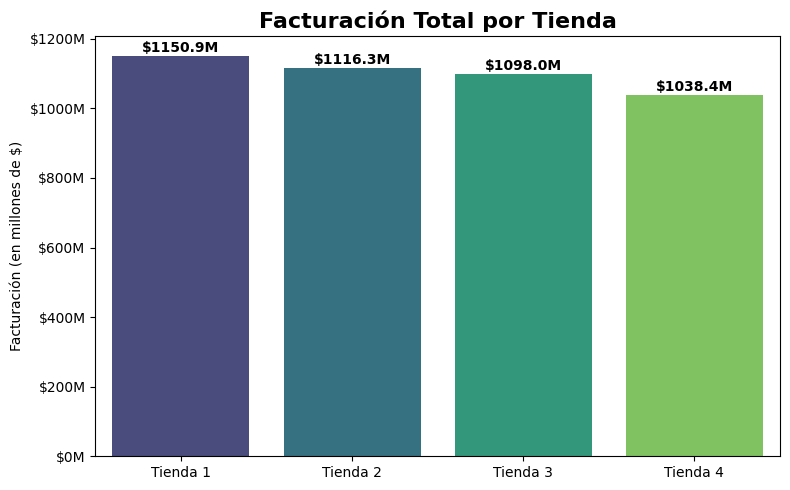

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [facturacion1, facturacion2, facturacion3, facturacion4]

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    x='Tienda',
    y='Facturación Total',
    data=df_facturacion,
    palette='viridis'
)

# Títulos y etiquetas
plt.title('Facturación Total por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Facturación (en millones de $)')
plt.xlabel('')

# Convertir el eje Y a millones para que sea más legible
valores = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${x/1e6:.0f}M' for x in valores])

# Etiquetas encima de cada barra
for i, v in enumerate(df_facturacion['Facturación Total']):
    plt.text(i, v + (v * 0.01), f"${v/1e6:.1f}M", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [11]:
# Combinamos todas las tiendas con una columna 'Tienda'
datos_tiendas = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

# Agrupamos: ingresos por Tienda y Categoría
ventas_categoria = (datos_tiendas
                    .groupby(['Tienda', 'Categoría del Producto'])['Precio']
                    .sum()
                    .reset_index()
                    .sort_values(['Tienda', 'Precio'], ascending=[True, False]))

# Convertimos a millones para el gráfico
ventas_categoria['Precio_Millones'] = ventas_categoria['Precio'] / 1_000_000

/tmp/ipython-input-2660360318.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))


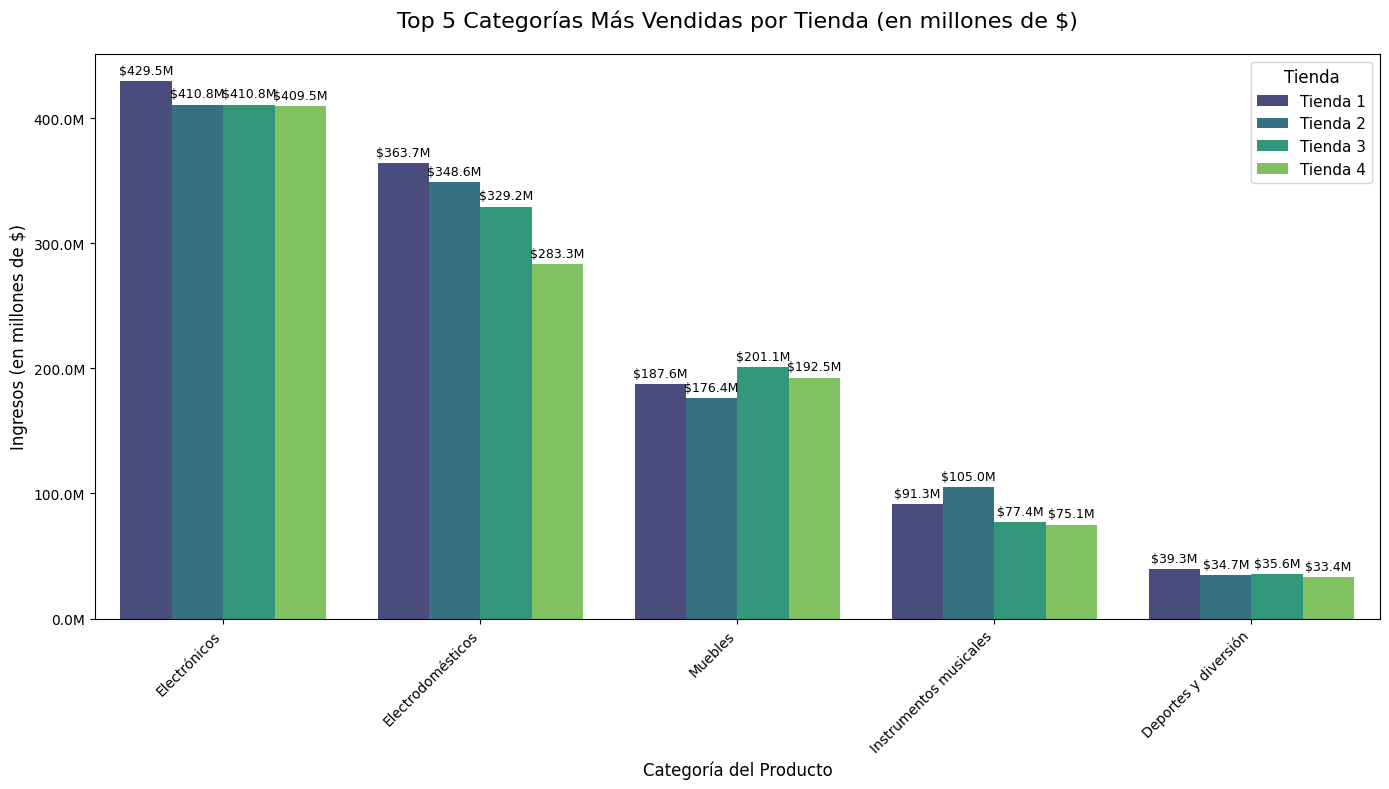

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Tomamos solo las TOP 5 categorías por tienda (para no saturar)
top_categorias_por_tienda = (ventas_categoria
                             .groupby('Tienda')
                             .apply(lambda x: x.head(5))
                             .reset_index(drop=True))

# Gráfico
ax = sns.barplot(
    data=top_categorias_por_tienda,
    x='Categoría del Producto',
    y='Precio_Millones',
    hue='Tienda',
    palette='viridis'
)

plt.title('Top 5 Categorías Más Vendidas por Tienda (en millones de $)', fontsize=16, pad=20)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Ingresos (en millones de $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda', title_fontsize=12, fontsize=11)

# Formato del eje Y: sin notación científica, con "M"
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}M'))

# Agregar valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='$%.1fM', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [14]:
# Agregamos una columna para identificar la tienda en cada DataFrame
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todo en un solo DataFrame
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])


In [15]:
# 1) Calcular calificación promedio por tienda
calificacion_media = datos.groupby('Tienda')['Calificación'].mean().reset_index()

# 2) Ordenar y redondear
calificacion_media['Calificación'] = calificacion_media['Calificación'].round(2)
calificacion_media = calificacion_media.sort_values(by='Calificación', ascending=False).reset_index(drop=True)

# 3) Mostrar la tabla
print("Calificación promedio por tienda:\n")
display(calificacion_media)


Calificación promedio por tienda:



,Tienda,Calificación
0,Tienda 3,4.05
1,Tienda 2,4.04
2,Tienda 4,4.00
3,Tienda 1,3.98


/tmp/ipython-input-1950461594.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


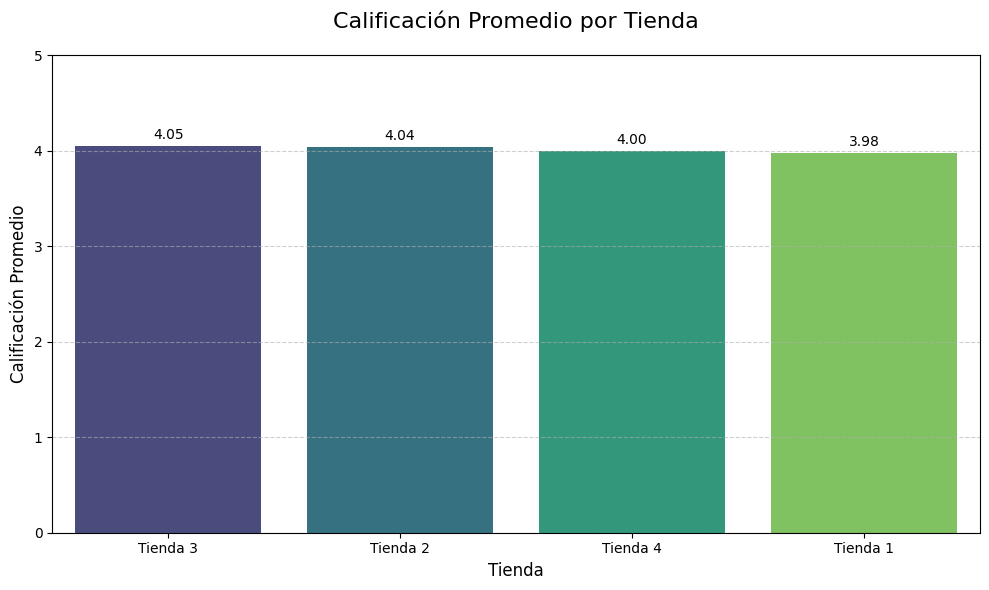

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos orden descendente por calificación
calificacion_media = calificacion_media.sort_values('Calificación', ascending=False)

plt.figure(figsize=(10, 6))

# Gráfico de barras con estilo similar
ax = sns.barplot(
    data=calificacion_media,
    x='Tienda',
    y='Calificación',
    palette='viridis'
)

plt.title('Calificación Promedio por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 5)  # escala de 0 a 5 para reflejar sistema de calificación

# Agregar etiquetas de valor sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

# Fondo y rejilla similares al otro gráfico
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [19]:
# 1️⃣ Agrupar por producto y sumar el total vendido (usando Precio)
productos_vendidos = datos.groupby('Producto')['Precio'].sum().reset_index()

# 2️⃣ Ordenar de mayor a menor
productos_vendidos = productos_vendidos.sort_values(by='Precio', ascending=False)

# 3️⃣ Seleccionar los Top 5 y los Bottom 5
top_productos = productos_vendidos.head(5)
menos_vendidos = productos_vendidos.tail(5)

print("🛒 Top 5 Productos Más Vendidos (por facturación):\n")
display(top_productos)

print("\n📉 Top 5 Productos Menos Vendidos (por facturación):\n")
display(menos_vendidos)


🛒 Top 5 Productos Más Vendidos (por facturación):



,Producto,Precio
48,TV LED UHD 4K,432489600.0
25,Iphone 15,401051200.0
39,Refrigerador,384937400.0
45,Smart TV,290221800.0
28,Lavadora de ropa,242468600.0



📉 Top 5 Productos Menos Vendidos (por facturación):



,Producto,Precio
42,Set de vasos,5584200.0
0,Ajedrez de madera,5149100.0
19,Dinosaurio Rex,3112900.0
17,Cuerda para saltar,3068300.0
16,Cubo mágico 8x8,2729300.0


/tmp/ipython-input-67926497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_productos['Precio_Millones'] = top_productos['Precio'] / 1e6
/tmp/ipython-input-67926497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


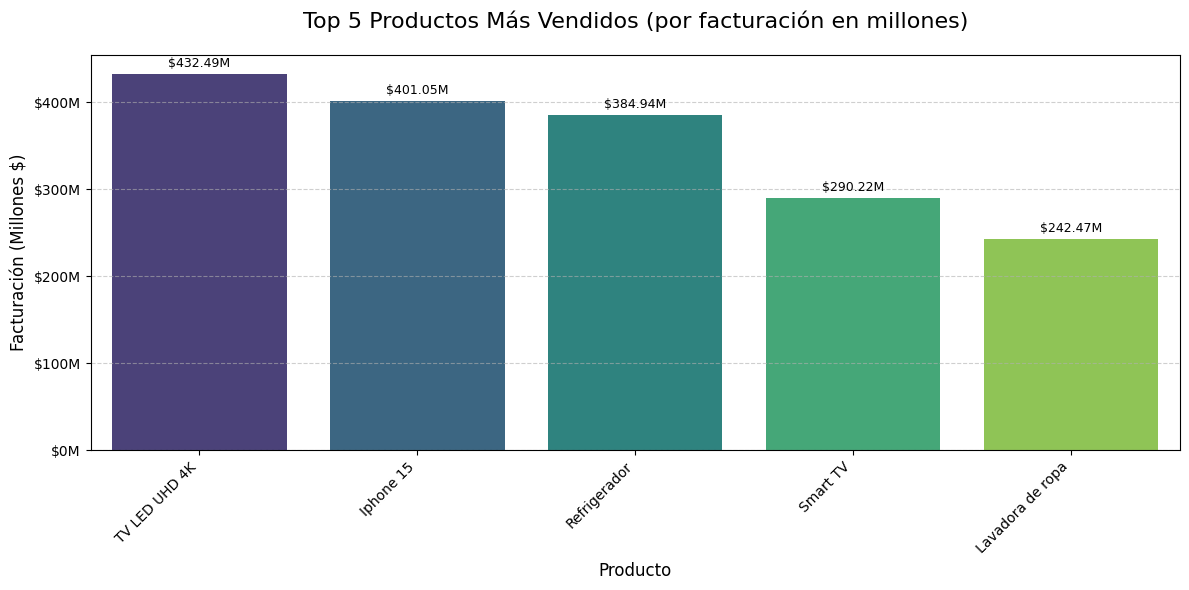

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna en millones
top_productos['Precio_Millones'] = top_productos['Precio'] / 1e6

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_productos,
    x='Producto',
    y='Precio_Millones',
    palette='viridis'
)

plt.title('Top 5 Productos Más Vendidos (por facturación en millones)', fontsize=16, pad=20)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Facturación (Millones $)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# ✅ Etiquetas de cada barra con formato en millones
for container in ax.containers:
    ax.bar_label(container, labels=[f"${v:,.2f}M" for v in container.datavalues],
                 fontsize=9, padding=3)

# ✅ Eje Y abreviado también en millones
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}M"))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3317306850.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


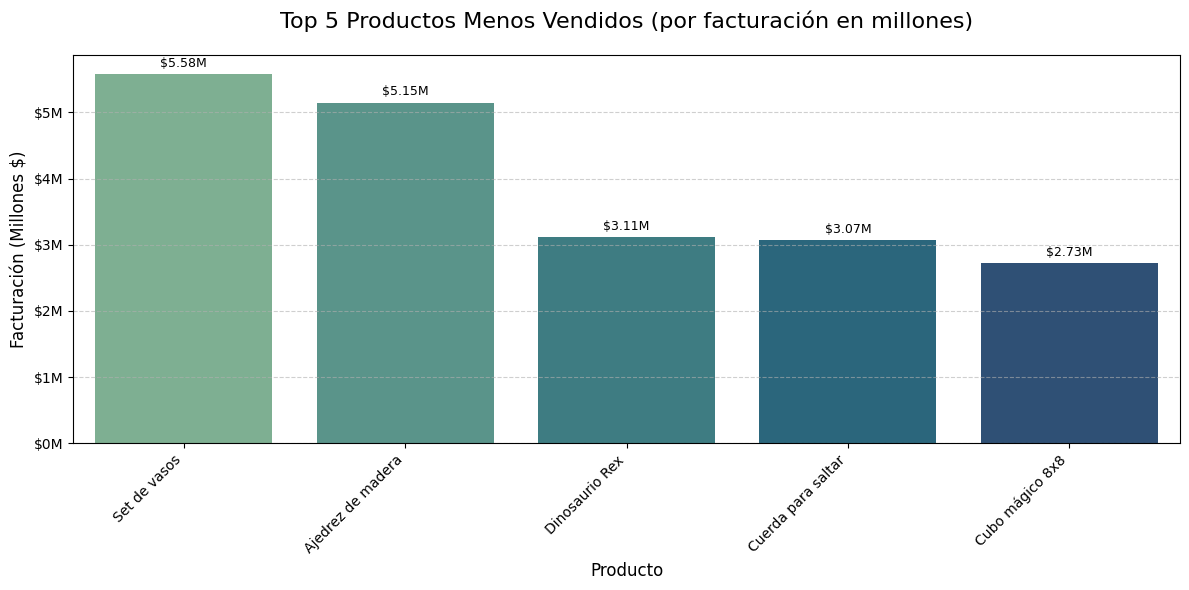

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los 5 productos menos vendidos
bottom_productos = (
    datos.groupby('Producto', as_index=False)['Precio']
    .sum()
    .sort_values(by='Precio', ascending=True)
    .head(5)
)

# Convertimos a millones
bottom_productos['Precio_Millones'] = bottom_productos['Precio'] / 1e6

# (opcional) Si quieres mostrar de mayor a menor dentro de los menos vendidos
bottom_productos = bottom_productos.sort_values(by='Precio', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=bottom_productos,
    x='Producto',
    y='Precio_Millones',
    order=bottom_productos['Producto'],  # <- fuerza el orden del DataFrame
    palette='crest'
)

plt.title('Top 5 Productos Menos Vendidos (por facturación en millones)', fontsize=16, pad=20)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Facturación (Millones $)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Etiquetas encima de las barras
for container in ax.containers:
    ax.bar_label(container, labels=[f"${v:,.2f}M" for v in container.datavalues],
                 fontsize=9, padding=3)

# Formato del eje Y en millones
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}M"))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [30]:
# Análisis: calcular envío promedio por tienda
envio_promedio = (
    datos.groupby('Tienda', as_index=False)['Costo de envío']
    .mean()
    .sort_values(by='Costo de envío', ascending=False)
)

# Mostrar los resultados con formato de miles de pesos
envio_promedio['Costo Promedio Formateado'] = envio_promedio['Costo de envío'].apply(lambda x: f"${x:,.0f}".replace(",", "."))

print("1️⃣ ENVÍO PROMEDIO POR TIENDA\n")
print(envio_promedio[['Tienda', 'Costo Promedio Formateado']])


1️⃣ ENVÍO PROMEDIO POR TIENDA

     Tienda Costo Promedio Formateado
0  Tienda 1                   $26.019
1  Tienda 2                   $25.216
2  Tienda 3                   $24.806
3  Tienda 4                   $23.459


/tmp/ipython-input-1201122863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


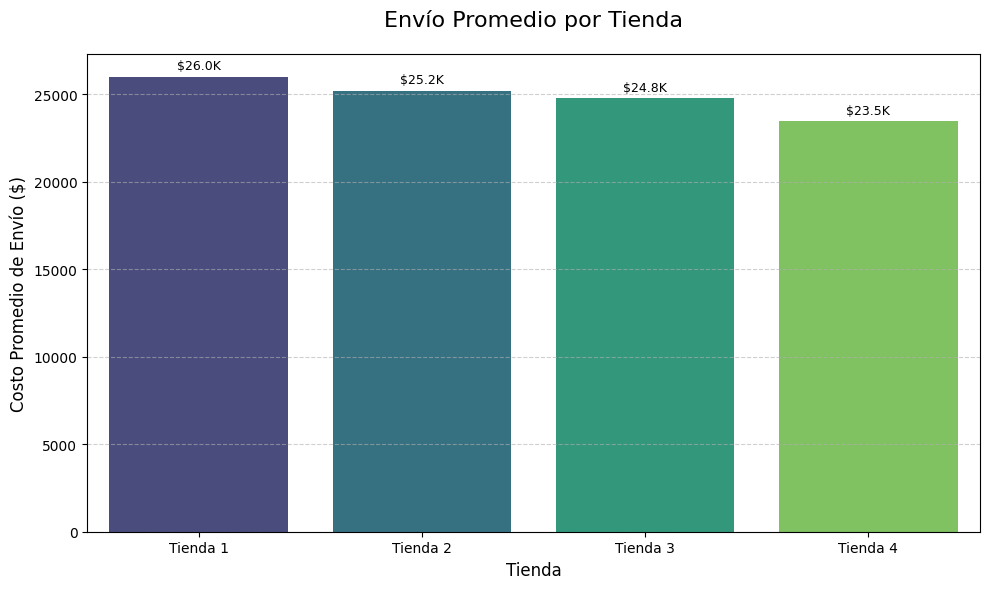

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=envio_promedio,
    x='Tienda',
    y='Costo de envío',
    palette='viridis'
)

plt.title('Envío Promedio por Tienda', fontsize=16, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo Promedio de Envío ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f"${v/1_000:,.1f}K" for v in container.datavalues],
                 fontsize=9, padding=3)

plt.tight_layout()
plt.show()
